#COFFEE

In [1]:
import pandas as pd

file_path = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'


data = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data = data[data['Date'] != 'Date']

daily_summary = (
    data.groupby('Date')
    .agg(
        Places=('Place', lambda x: ', '.join(x.unique())),
        Total_Amount=('Amount', 'sum')
    )
    .reset_index()
)

for index, row in daily_summary.iterrows():
    print(f"Date: {row['Date']}, Places: {row['Places']}, Total Amount: {row['Total_Amount']}")


Date: 2023-11-05, Places: BREKKIE, MORN, Total Amount: 2.0
Date: 2023-11-10, Places: COFFY, Total Amount: 1.0
Date: 2023-11-15, Places: COFFY, Total Amount: 1.0
Date: 2023-11-16, Places: STARBUCKS, Total Amount: 1.0
Date: 2023-11-17, Places: COFFY, Total Amount: 1.0
Date: 2023-11-18, Places: COFFY, Total Amount: 1.0
Date: 2023-11-20, Places: COFFY, Total Amount: 1.0
Date: 2023-11-21, Places: COFFY, Total Amount: 1.0
Date: 2023-11-22, Places: COFFY, Total Amount: 1.0
Date: 2023-11-23, Places: STARBUCKS, Total Amount: 1.0
Date: 2023-11-24, Places: COFFY, Total Amount: 1.0
Date: 2023-11-27, Places: COFFY, Total Amount: 1.0
Date: 2023-12-04, Places: COFFY, Total Amount: 1.0
Date: 2023-12-05, Places: COFFY, Total Amount: 1.0
Date: 2023-12-11, Places: COFFY, Total Amount: 1.0
Date: 2023-12-13, Places: COFFY, Total Amount: 1.0
Date: 2023-12-15, Places: COFFY, Total Amount: 1.0
Date: 2023-12-18, Places: COFFY, Total Amount: 1.0
Date: 2023-12-19, Places: STARBUCKS, Total Amount: 1.0
Date: 2023-

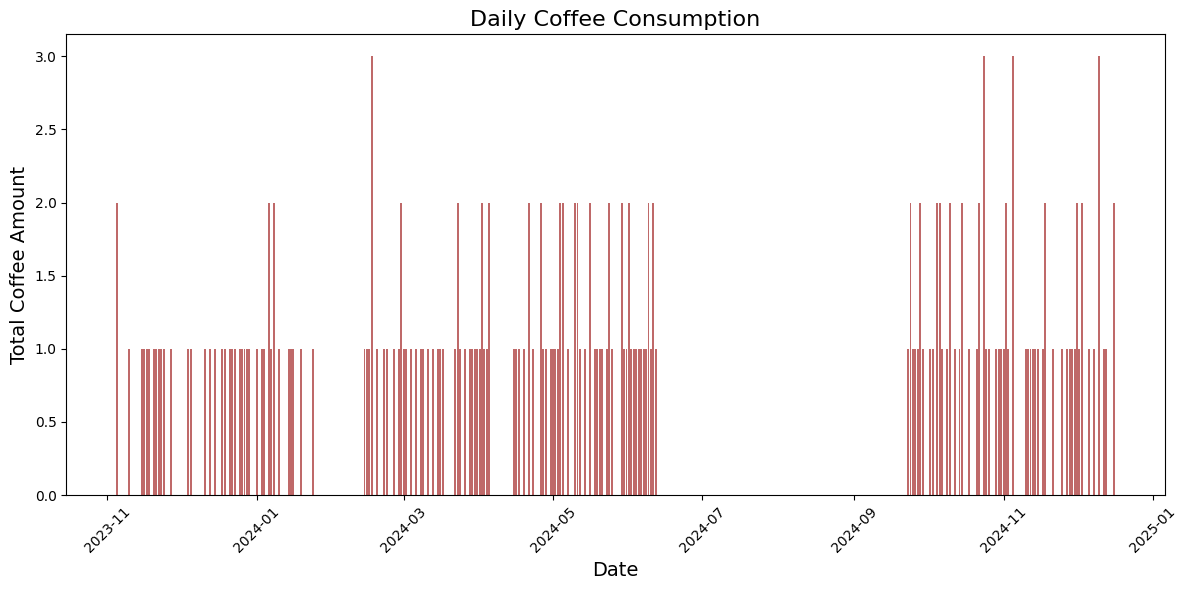

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

data = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data = data[data['Date'] != 'Date'] 

daily_summary = (
    data.groupby('Date')
    .agg(
        Places=('Place', lambda x: ', '.join(x.unique())),
        Total_Amount=('Amount', 'sum')
    )
    .reset_index()
)

daily_summary['Date'] = pd.to_datetime(daily_summary['Date'])

daily_summary = daily_summary.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.bar(daily_summary['Date'], daily_summary['Total_Amount'], color='brown', alpha=0.7)

plt.title('Daily Coffee Consumption', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Coffee Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()


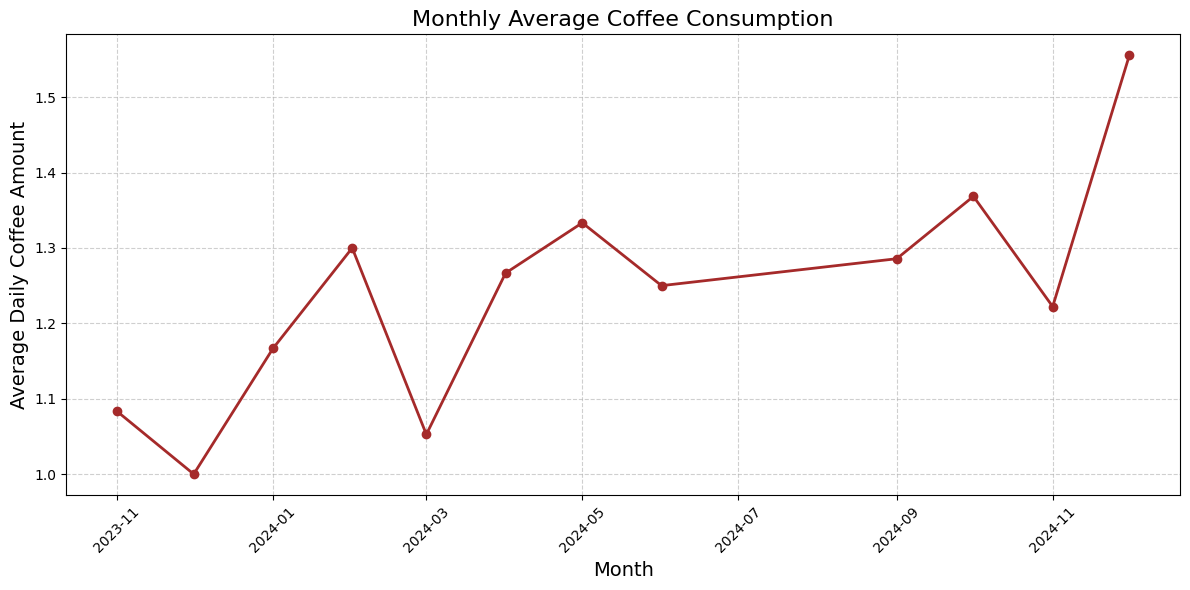

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

data = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data = data[data['Date'] != 'Date'] 

data['Date'] = pd.to_datetime(data['Date'])

daily_totals = data.groupby('Date')['Amount'].sum().reset_index()

daily_totals['YearMonth'] = daily_totals['Date'].dt.to_period('M')

monthly_average = (
    daily_totals.groupby('YearMonth')['Amount']
    .mean()
    .reset_index()
    .rename(columns={'Amount': 'Monthly_Average'})
)

monthly_average['YearMonth'] = monthly_average['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(
    monthly_average['YearMonth'],
    monthly_average['Monthly_Average'],
    marker='o',
    color='brown',
    linestyle='-',
    linewidth=2,
)

plt.title('Monthly Average Coffee Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Daily Coffee Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


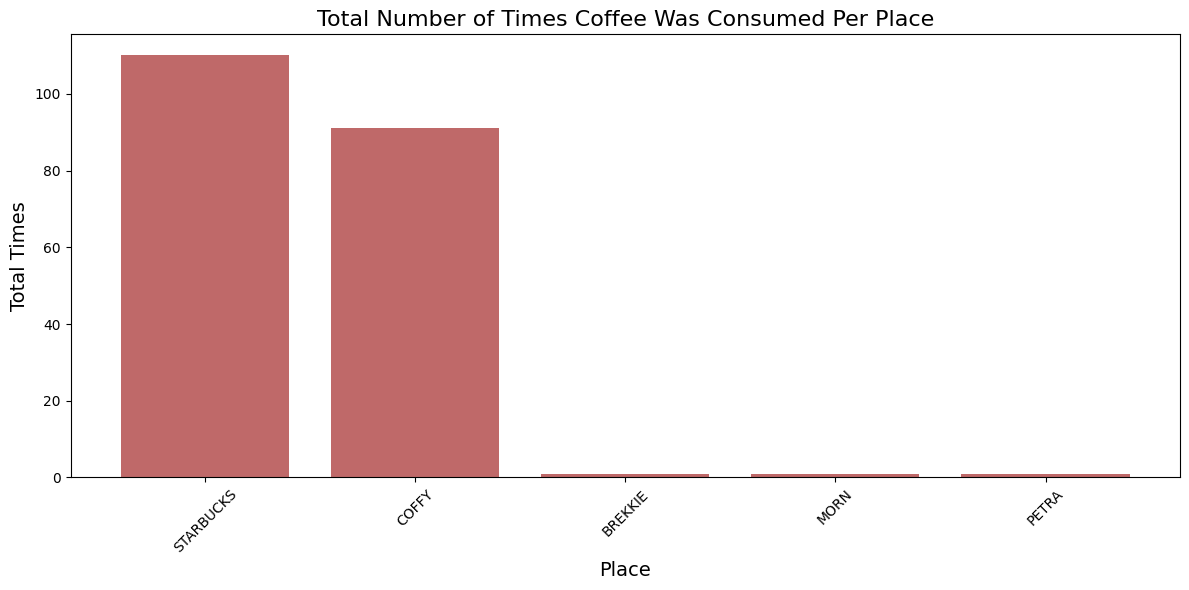

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

data = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data = data[data['Date'] != 'Date']  

place_counts = (
    data.groupby('Place')['Amount']
    .count()
    .reset_index()
    .rename(columns={'Amount': 'Total_Times'})
)

place_counts = place_counts.sort_values(by='Total_Times', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(place_counts['Place'], place_counts['Total_Times'], color='brown', alpha=0.7)

plt.title('Total Number of Times Coffee Was Consumed Per Place', fontsize=16)
plt.xlabel('Place', fontsize=14)
plt.ylabel('Total Times', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()


In [5]:
import pandas as pd

file_path = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

data = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data = data[data['Date'] != 'Date']  

price_dict = {
    'STARBUCKS': 100,
    'COFFY': 60,
    'BREKKIE': 150,
    'MORN': 200,
    'PETRA': 200
}

data['Spending'] = data.apply(lambda row: row['Amount'] * price_dict.get(row['Place'], 0), axis=1)

daily_spending = data.groupby('Date')['Spending'].sum().reset_index()

for index, row in daily_spending.iterrows():
    print(f"Date: {row['Date']}, Total Spending: {row['Spending']} TL")


Date: 2023-11-05, Total Spending: 350.0 TL
Date: 2023-11-10, Total Spending: 60.0 TL
Date: 2023-11-15, Total Spending: 60.0 TL
Date: 2023-11-16, Total Spending: 100.0 TL
Date: 2023-11-17, Total Spending: 60.0 TL
Date: 2023-11-18, Total Spending: 60.0 TL
Date: 2023-11-20, Total Spending: 60.0 TL
Date: 2023-11-21, Total Spending: 60.0 TL
Date: 2023-11-22, Total Spending: 60.0 TL
Date: 2023-11-23, Total Spending: 100.0 TL
Date: 2023-11-24, Total Spending: 60.0 TL
Date: 2023-11-27, Total Spending: 60.0 TL
Date: 2023-12-04, Total Spending: 60.0 TL
Date: 2023-12-05, Total Spending: 60.0 TL
Date: 2023-12-11, Total Spending: 60.0 TL
Date: 2023-12-13, Total Spending: 60.0 TL
Date: 2023-12-15, Total Spending: 60.0 TL
Date: 2023-12-18, Total Spending: 60.0 TL
Date: 2023-12-19, Total Spending: 100.0 TL
Date: 2023-12-21, Total Spending: 100.0 TL
Date: 2023-12-22, Total Spending: 60.0 TL
Date: 2023-12-23, Total Spending: 100.0 TL
Date: 2023-12-25, Total Spending: 60.0 TL
Date: 2023-12-26, Total Spen

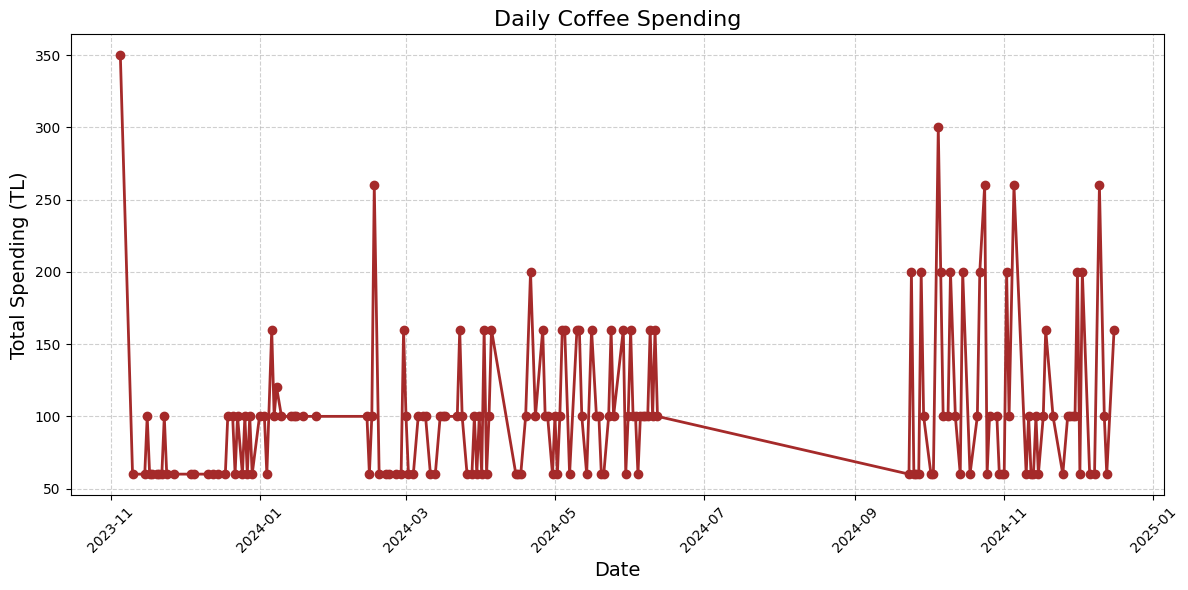

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

data = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data = data[data['Date'] != 'Date']

price_dict = {
    'STARBUCKS': 100,
    'COFFY': 60,
    'BREKKIE': 150,
    'MORN': 200,
    'PETRA': 200
}

data['Spending'] = data.apply(lambda row: row['Amount'] * price_dict.get(row['Place'], 0), axis=1)

daily_spending = data.groupby('Date')['Spending'].sum().reset_index()

daily_spending['Date'] = pd.to_datetime(daily_spending['Date'])

plt.figure(figsize=(12, 6))
plt.plot(
    daily_spending['Date'],
    daily_spending['Spending'],
    marker='o',
    color='brown',
    linestyle='-',
    linewidth=2,
)

plt.title('Daily Coffee Spending', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Spending (TL)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


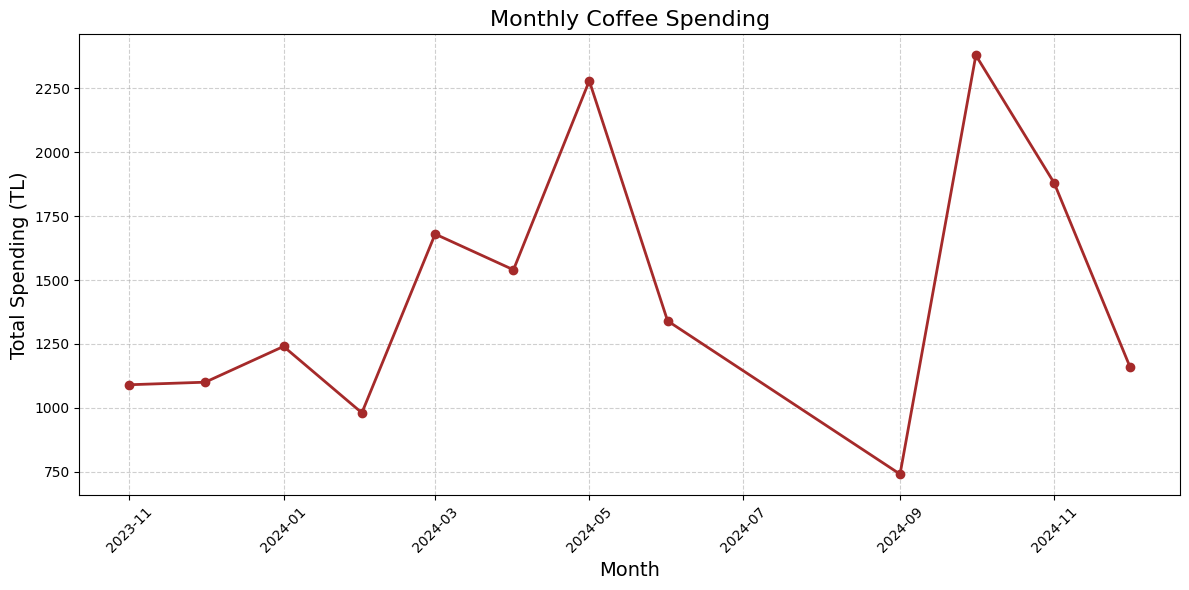

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

data = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data = data[data['Date'] != 'Date']

price_dict = {
    'STARBUCKS': 100,
    'COFFY': 60,
    'BREKKIE': 150,
    'MORN': 200,
    'PETRA': 200
}

data['Spending'] = data.apply(lambda row: row['Amount'] * price_dict.get(row['Place'], 0), axis=1)

data['Date'] = pd.to_datetime(data['Date'])

data['YearMonth'] = data['Date'].dt.to_period('M')

monthly_spending = data.groupby('YearMonth')['Spending'].sum().reset_index()

monthly_spending['YearMonth'] = monthly_spending['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(
    monthly_spending['YearMonth'],
    monthly_spending['Spending'],
    marker='o',
    color='brown',
    linestyle='-',
    linewidth=2,
)

plt.title('Monthly Coffee Spending', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Spending (TL)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


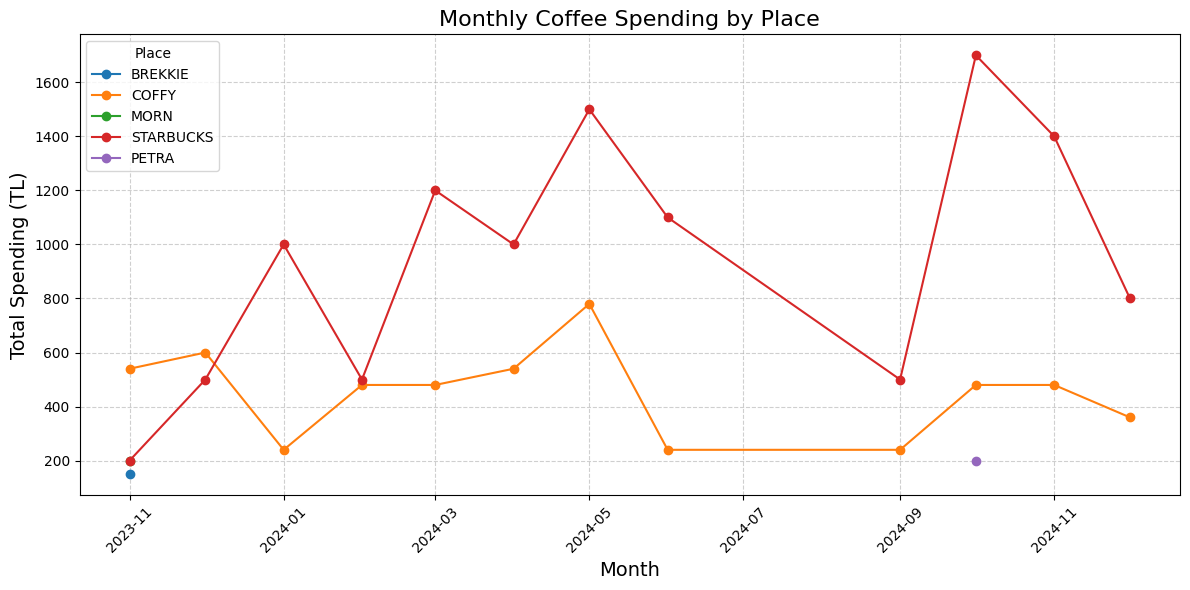

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

data = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data = data[data['Date'] != 'Date']

price_dict = {
    'STARBUCKS': 100,
    'COFFY': 60,
    'BREKKIE': 150,
    'MORN': 200,
    'PETRA': 200
}

data['Spending'] = data.apply(lambda row: row['Amount'] * price_dict.get(row['Place'], 0), axis=1)

data['Date'] = pd.to_datetime(data['Date'])

data['YearMonth'] = data['Date'].dt.to_period('M')

monthly_spending_by_place = data.groupby(['YearMonth', 'Place'])['Spending'].sum().reset_index()

monthly_spending_by_place['YearMonth'] = monthly_spending_by_place['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))

for place in monthly_spending_by_place['Place'].unique():
    place_data = monthly_spending_by_place[monthly_spending_by_place['Place'] == place]
    plt.plot(place_data['YearMonth'], place_data['Spending'], marker='o', label=place)

plt.title('Monthly Coffee Spending by Place', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Spending (TL)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Place')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()
